In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(df)

768

There are a total of 768 measurements in this dataset

In [5]:
df['Age'].mean()

33.240885416666664

The mean age of the sample is 33.24 years. 

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In this sample 500 patients do not have diabetes and 268 patients have diabetes. 

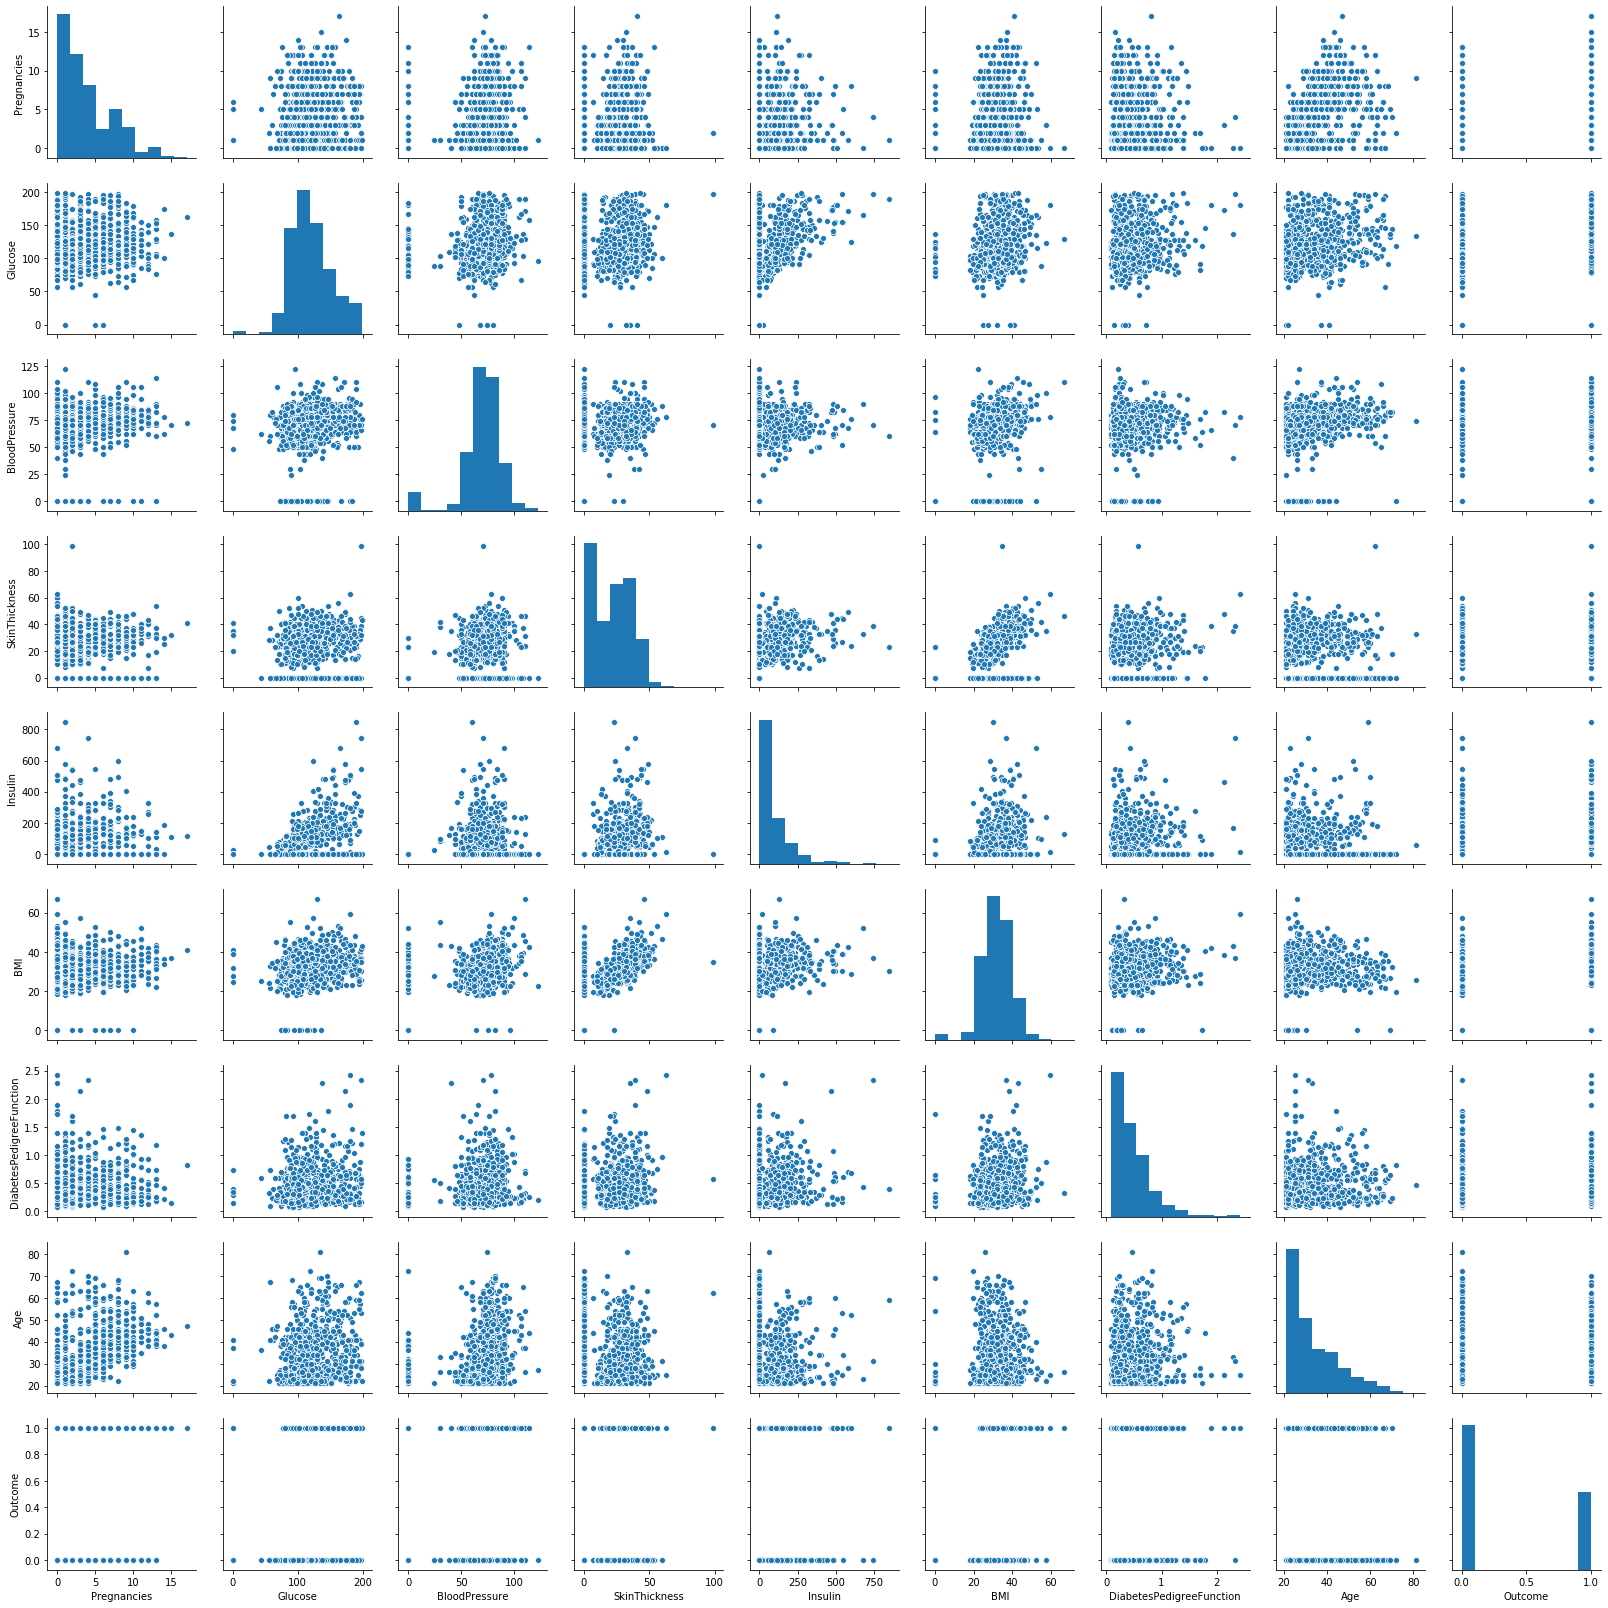

In [7]:
sns.pairplot(df)

From the histograms for each of the features, there are numerous values with 0 causing shifts in the histogram. This may happen due to missing values. 

In [8]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

None of the features have any null values

In [9]:
df["Glucose"] = df["Glucose"].replace(0, np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.NaN)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.NaN)
df["Insulin"] = df["Insulin"].replace(0, np.NaN)
df["BMI"] = df["BMI"].replace(0, np.NaN)

C:\Users\rithv\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rithv\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


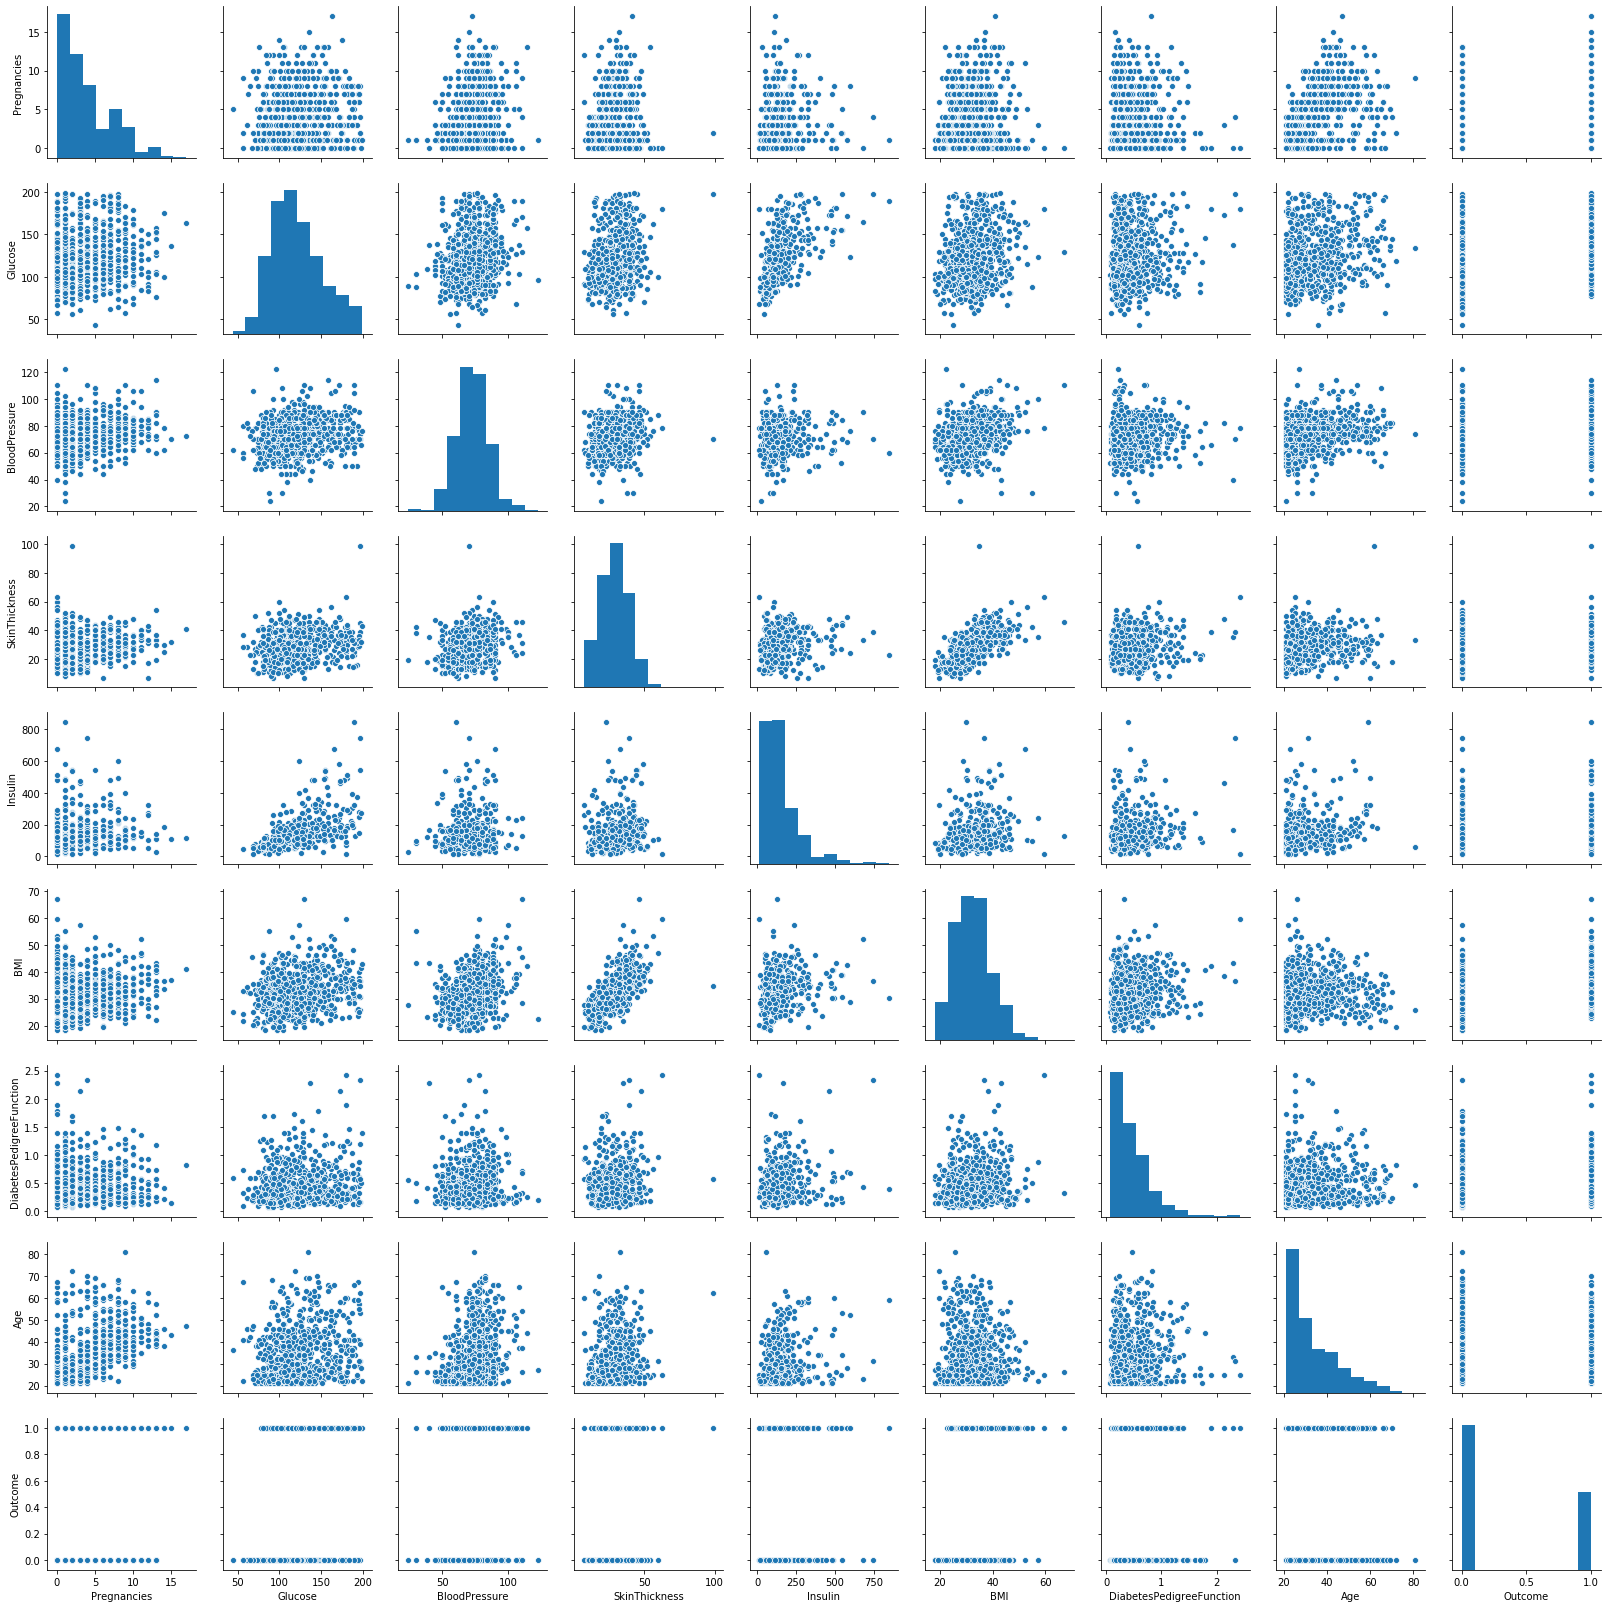

In [10]:
sns.pairplot(df)

After replacing the 0 with NaN, we can see the gaps where the missing values occur. 

In [11]:
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

b

In [12]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

This command tells how many missing values there are in each feature. According to this list, Insulin feature has the most amount of missing values. 

In [13]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

This command replaces the NaN values with the median of that column. This is a valid procedure because we are able to remove the missing information and predict a value for those instances. In this case, by replaning it with the median we are estimating those instances with the center of the dataset. However, replacing the NaN value with the median of the column reduces the variablity of the dataset. This reduced variablity may or may not create bias in the dataset and the final results. 

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


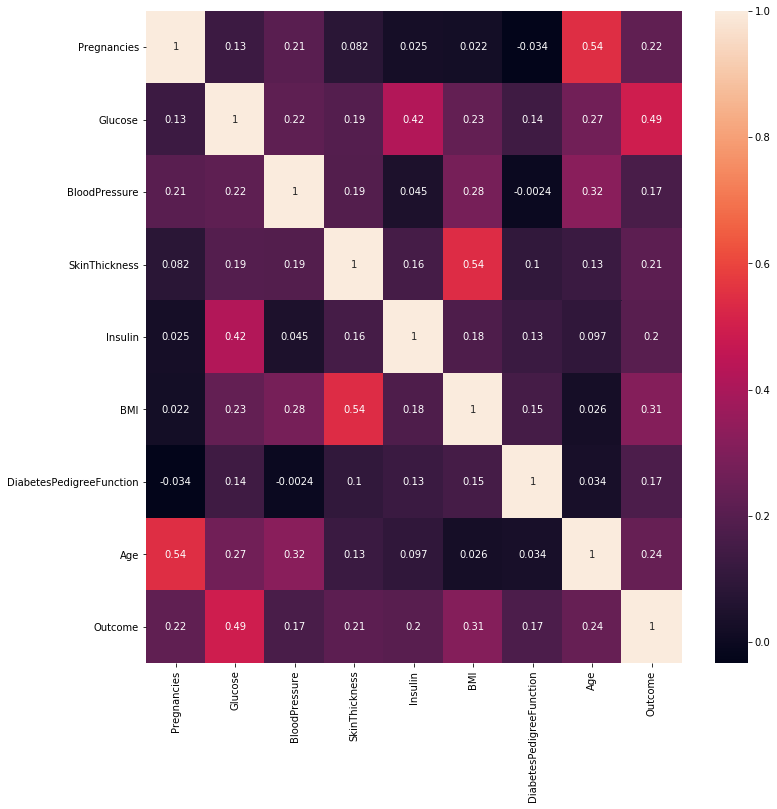

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df.corr(),annot=True)
plt.show()

According to the heatmap, Age and pregancy have a correlation as well as BMI and skin thickness. However, both of these relationships are not strongly correlated since their r value is 0.54. The strongest correlation with the outcome is Glucose. 

In [16]:
mean_ndb = df[df['Outcome'] == 0]['BloodPressure'].mean()
mean_db = df[df['Outcome'] == 1]['BloodPressure'].mean()
print(mean_ndb)
print(mean_db)

70.92
75.1231343283582


In [17]:
df.sort_values(by=['Outcome','BloodPressure'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0
80,3,113.0,44.0,13.0,125.0,22.4,0.140,22,0
575,1,119.0,44.0,47.0,63.0,35.5,0.280,25,0
576,6,108.0,44.0,20.0,130.0,24.0,0.813,35,0
741,3,102.0,44.0,20.0,94.0,30.8,0.400,26,0
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0
707,2,127.0,46.0,21.0,335.0,34.4,0.176,22,0
75,1,117.0,48.0,20.0,125.0,24.7,0.140,22,0


Patients with diabetes have higher average blood pressure than patients without diabetes. The dataframe can be sorted using the `sort_values` function. This dataframe Blood Pressure was sorted in ascednging order with the patients without Diabetes displayed first. 

In [18]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


Between the two Outcomes, patients with diabetes have higher averages among all of the features compared to the patients without any diabetes. 

C:\Users\rithv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rithv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


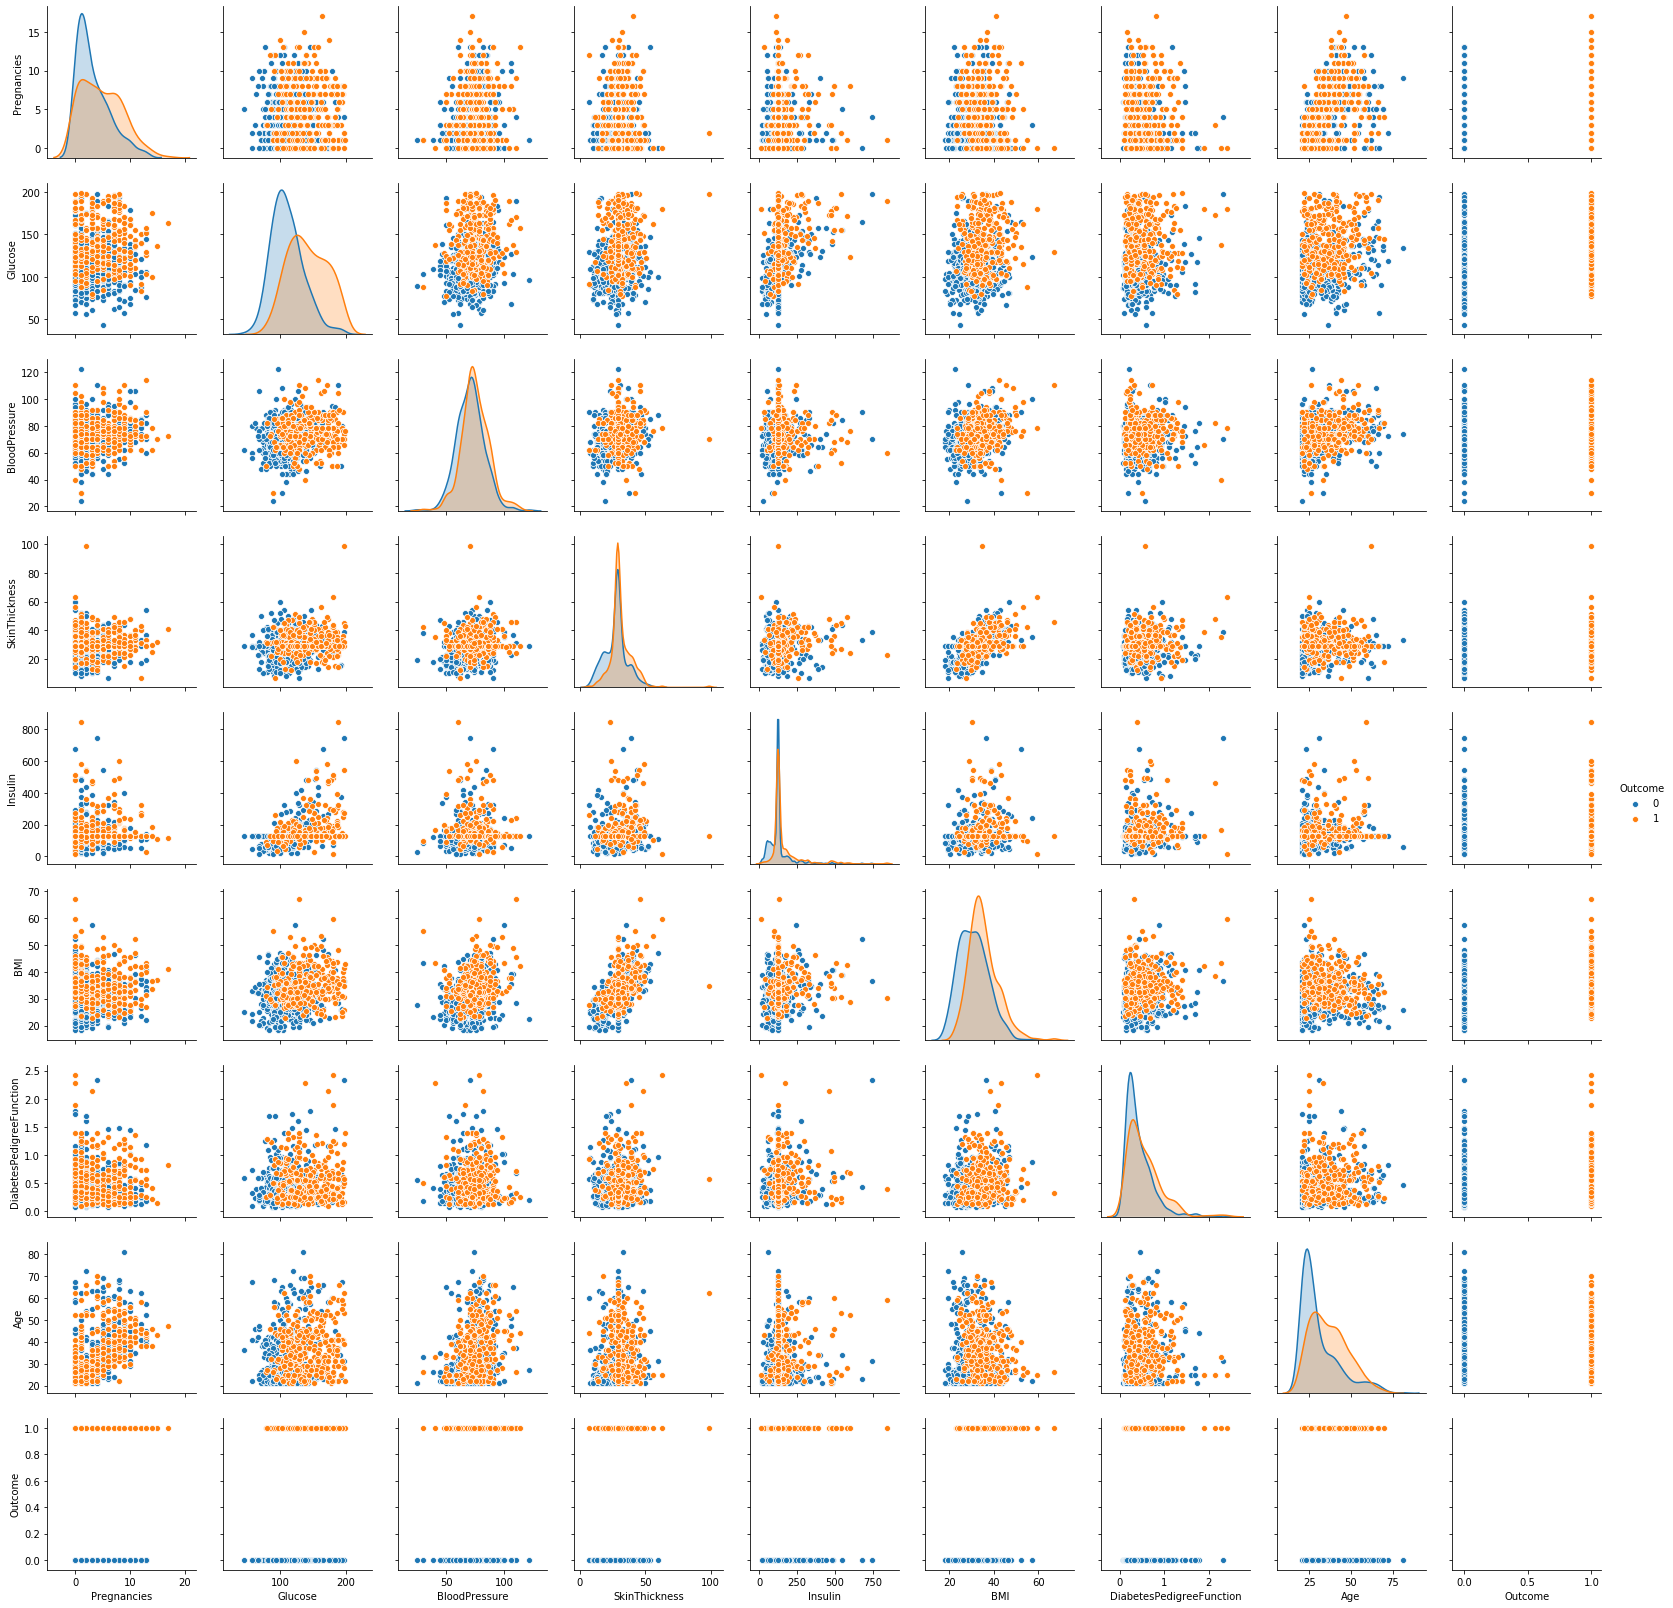

In [19]:
sns.pairplot(df, hue = 'Outcome')

The `hue` command highlights the different datapoints. In this case, the command higlights the datapoints based on the outcome. Across the board, there does not seem to be a trend based on the outcome. However, in many scenarios, it appears that the Orange dots, which represent datapoints that have diabetes are slightly larger than the datapoints that donot have the diabetes outcome. 



Text(0.5, 0, 'BloodPressure')

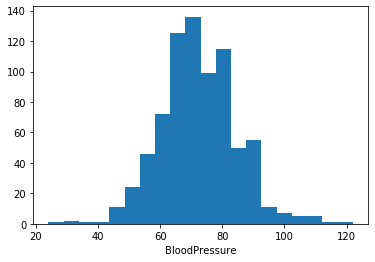

In [20]:
plt.hist(df['BloodPressure'],bins = 20)
plt.xlabel('BloodPressure')

From this historgram, Blood Pressure data appears to be normally distributed because the histogram looks roughly symmetric. 

In [21]:
#H0 = Blood Pressure is normally distributed
#H1: Blood Pressure is not normally distribued
alpha = 0.01
stats.normaltest(df["BloodPressure"])

NormaltestResult(statistic=21.014516861396352, pvalue=2.7337301565003257e-05)

Since the pvalue is well below the signifiance level, we cannot reject the null hypothesis. Blood Pressure is normally distributed. 

((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

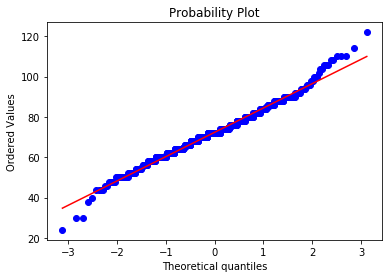

In [22]:
stats.probplot(df["BloodPressure"], plot = plt)

From this QQ plot, it can be assumed that the Blood Pressure data is normally distributed. The data appears to be in a stright line that lies on the red line. 

In [23]:
population_mean = df['BloodPressure'].mean()

sample_size = 100
sample = np.random.choice(a = df["BloodPressure"], size = sample_size)
sample_mean = np.mean(sample)

print(population_mean)
print(sample_mean)

72.38671875
70.47


In [24]:
np.percentile(sample, [5,95])

array([50., 90.])

In [25]:
np.percentile(sample, [0.5,99.5])

array([ 38.91, 100.06])

The difference between the 95% confidence interval and the 99% confidence interval the range for the 99% confidence interval is larger than the 95% confidence interval. This can be seen in the output where the minimum value of the 99% interval is lower than the minimum of the 95% confidence interval and the maximum of the 99% confidence interval is larger than the 95% confidence interval. However, the population mean and the sample mean lie within both of the intervals. 

In [26]:
# H0: the mean blood pressure of people without diabetes is same as the whole population
# H1: the mean blood pressure of people without diabetes is different than the population
# alpha = 1% 0.01

pop_mean = 71
stats.ttest_1samp(df[df["Outcome"] == 0]['BloodPressure'], pop_mean)

Ttest_1sampResult(statistic=-0.1499536162128066, pvalue=0.8808618001852418)

The null hypothesis cannot be rejected because the p-value is larger than the signifiance level. This means that the blood pressure of people without diabetes in this sample is not signifianctly different than the blood pressure of the population. 



In [27]:
# H0: the mean blood pressure of people with diabetes is same as the whole population
# H1: the mean blood pressure of people with diabetes is different than the population
# alpha = 1% 0.01

stats.ttest_1samp(df[df["Outcome"] == 1]['BloodPressure'], pop_mean)

Ttest_1sampResult(statistic=5.647629811136108, pvalue=4.158548511042713e-08)

The null hypothesis can be rejected because the p-value is smaller than the signifiance level. This means that the blood pressure of people with diabetes in this sample is signifianctly different than the blood pressure of the population. 

In [28]:
# H0: The mean blood pressure of people with diabetes is the same as the mean blood pressure of people without diabetes
# H1: The mean blood pressure of people with diabetes is different than the mean blood pressure of people without diabetes
# alpha: 0.01
stats.ttest_ind(df[df["Outcome"] == 1]['BloodPressure'], df[df["Outcome"] == 0]['BloodPressure'])

Ttest_indResult(statistic=4.65097622072597, pvalue=3.8908354906479115e-06)

The null hypothesis can be rejected because the p-value is lower than signifiance level. This means that there is signifianct difference between blood pressure of people with diabetes and blood pressure of people without diabetes. 

In [29]:
# H0: the mean glucose of people without diabetes is same as the whole population
# H1: the mean glucose of people without diabetes is different than the population
# alpha = 1% 0.01

popmean = 110

stats.ttest_1samp(df[df["Outcome"] == 0]['Glucose'], popmean)

Ttest_1sampResult(statistic=0.6172283043277479, pvalue=0.5373656835106907)

The null hypothesis cannot be rejected because the p-value is gerater than the signifiance value. There is no significant difference. 

In [30]:
# H0: the mean glucose of people with diabetes is same as the whole population
# H1: the mean glucose of people with diabetes is different than the population
# alpha = 1% 0.01

stats.ttest_1samp(df[df["Outcome"] == 1]['Glucose'], popmean)

Ttest_1sampResult(statistic=17.789016013683774, pvalue=3.145088204392815e-47)

The null hypothesis can be rejected because the p-value is gerater than the signifiance value. There is significant difference.

In [31]:
# H0: The mean glucose of people with diabetes is the same as the mean glucose of people without diabetes
# H1: The mean glucose of people with diabetes is different than the mean glucose of people without diabetes
# alpha: 0.01
stats.ttest_ind(df[df["Outcome"] == 1]['Glucose'], df[df["Outcome"] == 0]['Glucose'])

Ttest_indResult(statistic=15.673795182294105, pvalue=3.1287190418423694e-48)

The null hypothesis can be rejected because the p-value is gerater than the signifiance value. There is significant difference.

In [32]:
# H0: The mean insulin of people with diabetes is the same as the mean insulin of people without diabetes
# H1: The mean insulin of people with diabetes is different than the mean insulin of people without diabetes
# alpha: 0.01
stats.ttest_ind(df[df["Outcome"] == 1]['Insulin'], df[df["Outcome"] == 0]['Insulin'])

Ttest_indResult(statistic=5.76114539252401, pvalue=1.210025703412445e-08)

The null hypothesis can be rejected because the p-value is gerater than the signifiance value. There is significant difference.